## Импорт библиотек

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor



## Загрузка данных

In [20]:
california_housing = fetch_california_housing()
df = pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)
df['MedHouseVal'] = california_housing.target
df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [21]:
print("Размер датасета:", df.shape)
print("Пропущенные значения:")
print(df.isnull().sum())


Размер датасета: (20640, 9)
Пропущенные значения:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


##  EDA

In [22]:
df.describe().T.style.background_gradient(cmap='YlOrRd')


,count,mean,std,min,25%,50%,75%,max
MedInc,20640.000000,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.000000,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.000000,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.000000,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.000000,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.000000,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.000000,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.000000,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.000000,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


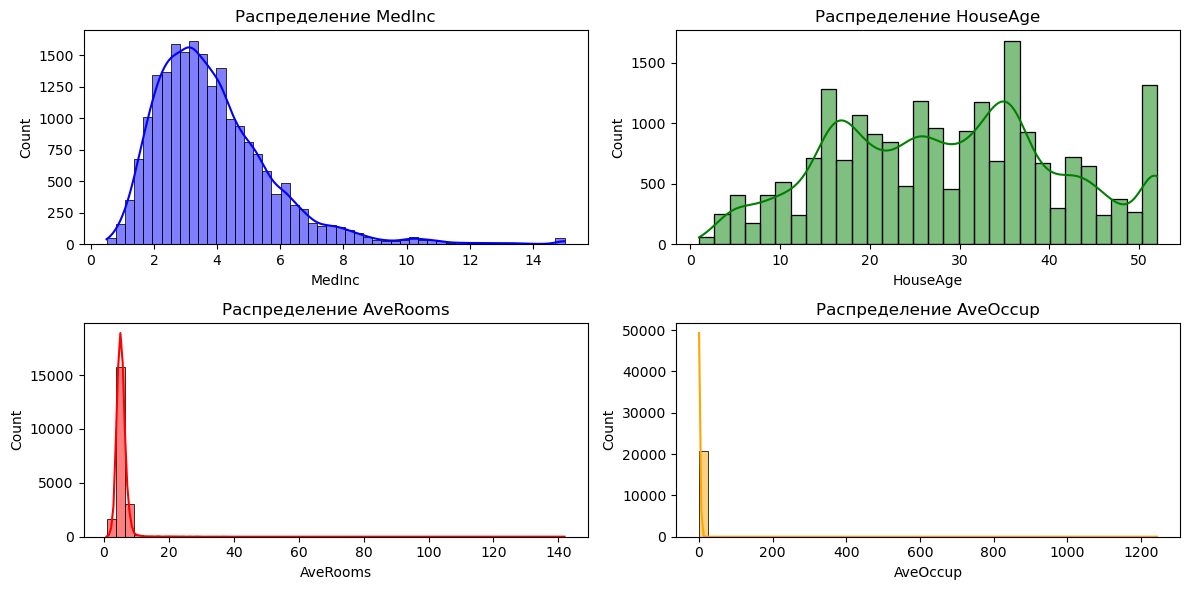

In [23]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(df['MedInc'], bins=50, kde=True, color='blue')
plt.title('Распределение MedInc')

plt.subplot(2, 2, 2)
sns.histplot(df['HouseAge'], bins=30, kde=True, color='green')
plt.title('Распределение HouseAge')

plt.subplot(2, 2, 3)
sns.histplot(df['AveRooms'], bins=50, kde=True, color='red')
plt.title('Распределение AveRooms')

plt.subplot(2, 2, 4)
sns.histplot(df['AveOccup'], bins=50, kde=True, color='orange')
plt.title('Распределение AveOccup')

plt.tight_layout()
plt.show()



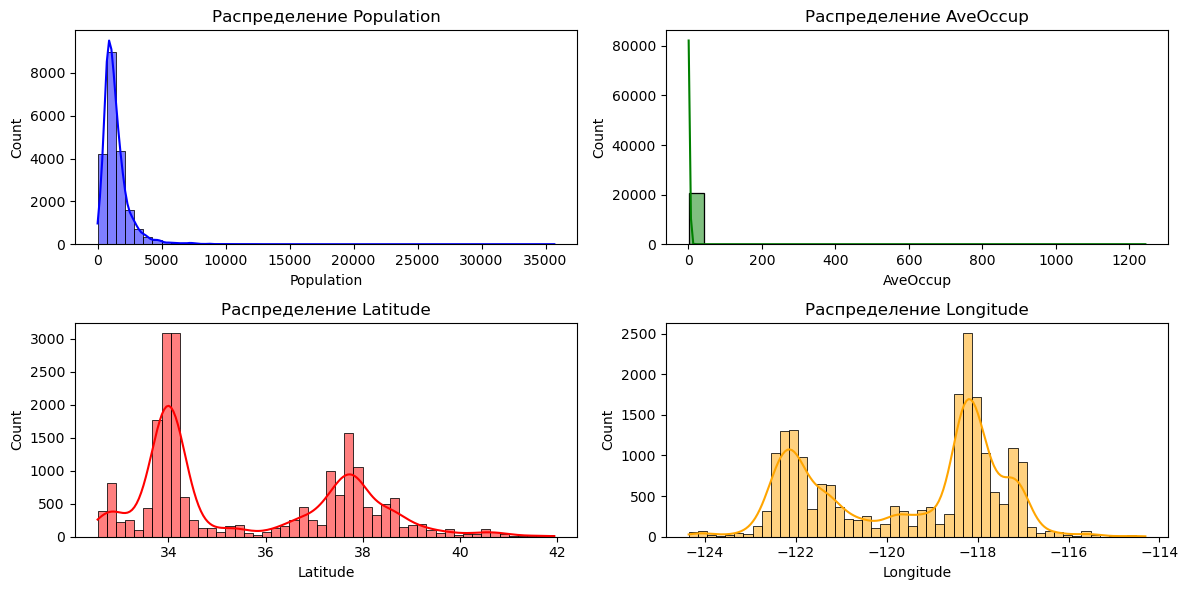

In [24]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(df['Population'], bins=50, kde=True, color='blue')
plt.title('Распределение Population')

plt.subplot(2, 2, 2)
sns.histplot(df['AveOccup'], bins=30, kde=True, color='green')
plt.title('Распределение AveOccup')

plt.subplot(2, 2, 3)
sns.histplot(df['Latitude'], bins=50, kde=True, color='red')
plt.title('Распределение Latitude')

plt.subplot(2, 2, 4)
sns.histplot(df['Longitude'], bins=50, kde=True, color='orange')
plt.title('Распределение Longitude')

plt.tight_layout()
plt.show()



Text(0.5, 1.0, 'Распределение MedHouseVal')

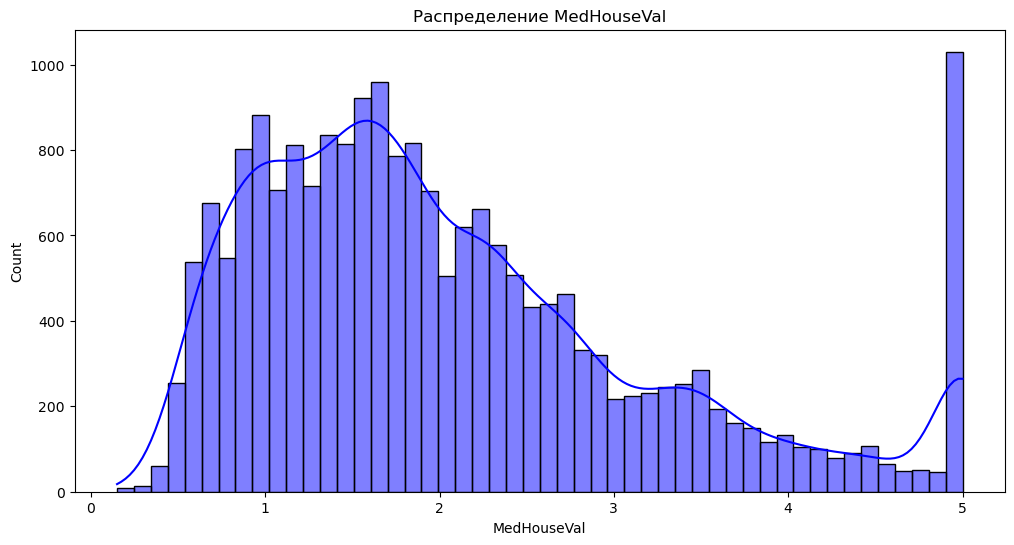

In [25]:
plt.figure(figsize=(12, 6))
sns.histplot(df['MedHouseVal'], bins=50, kde=True, color='blue')
plt.title('Распределение MedHouseVal')


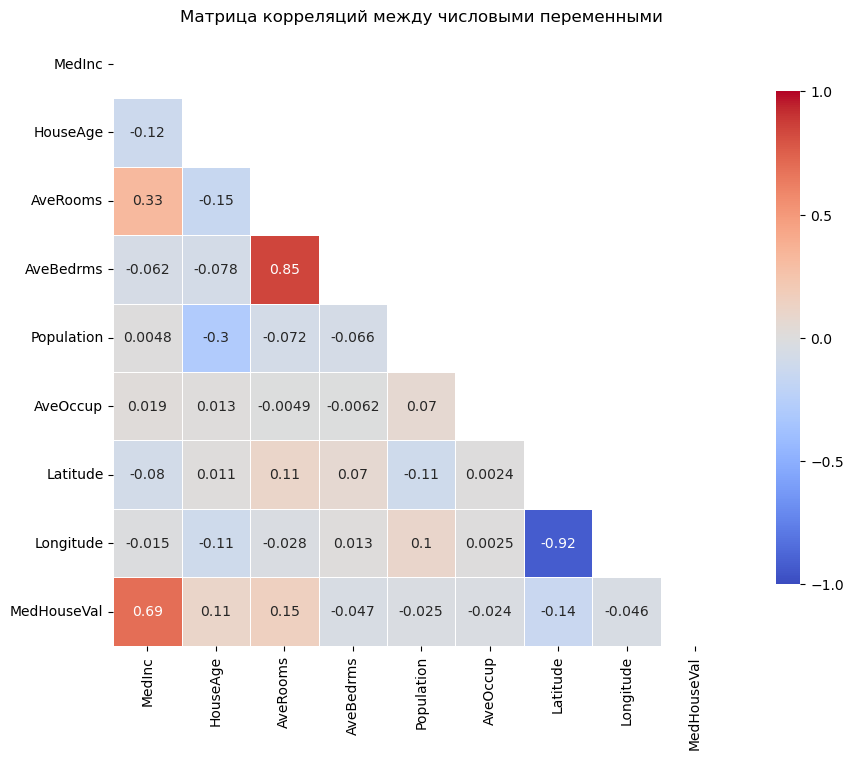

In [29]:
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0, 
            square=True, linewidths=.5, annot_kws={"size": 10}, 
            cbar_kws={"shrink": 0.8, "orientation": "vertical", "ticks": [-1, -0.5, 0, 0.5, 1]})
plt.title('Матрица корреляций между числовыми переменными')
plt.show()


##  Подготовка данных

In [41]:
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Обучение модели c 2мя признаками

In [30]:
correlation_matrix = df.corr()
print(correlation_matrix['MedHouseVal'].sort_values(ascending=False))


MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64


* Наибольшую коррелцию с таргетом имеют поля MedInc и AveRooms. Их и возмём для создания первой модели

In [34]:
X_train_selected = X_train[['MedInc', 'AveRooms']]
X_test_selected = X_test[['MedInc', 'AveRooms']]

model = LinearRegression()
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'R²: {r2:.4f}')
print(f'MSE: {mse:.4f}')
print(f'MAE: {mae:.4f}')


R²: 0.4642
MSE: 0.7022
MAE: 0.6247


* Могло быть хуже, но до идеала, как до Луны

##  Обучение модели со всеми признаками

In [35]:
model_all_features = LinearRegression()
model_all_features.fit(X_train, y_train)

y_pred_all_features = model_all_features.predict(X_test)

mse_all = mean_squared_error(y_test, y_pred_all_features)
mae_all = mean_absolute_error(y_test, y_pred_all_features)
r2_all = r2_score(y_test, y_pred_all_features)

print(f'R² (все признаки): {r2_all:.4f}')
print(f'MSE (все признаки): {mse_all:.4f}')
print(f'MAE (все признаки): {mae_all:.4f}')


R² (все признаки): 0.5758
MSE (все признаки): 0.5559
MAE (все признаки): 0.5332


* Метрики ошибок при добавлении всех фичей снизились (R2 увеличился из-за добавления большего количества признаков)

## Обучение MLP

In [42]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled


array([[-0.326196  ,  0.34849025, -0.17491646, ...,  0.05137609,
        -1.3728112 ,  1.27258656],
       [-0.03584338,  1.61811813, -0.40283542, ..., -0.11736222,
        -0.87669601,  0.70916212],
       [ 0.14470145, -1.95271028,  0.08821601, ..., -0.03227969,
        -0.46014647, -0.44760309],
       ...,
       [-0.49697313,  0.58654547, -0.60675918, ...,  0.02030568,
        -0.75500738,  0.59946887],
       [ 0.96545045, -1.07984112,  0.40217517, ...,  0.00707608,
         0.90651045, -1.18553953],
       [-0.68544764,  1.85617335, -0.85144571, ..., -0.08535429,
         0.99543676, -1.41489815]])

In [45]:
mlp = MLPRegressor(hidden_layer_sizes=(150, 50, 10), 
max_iter=1000, 
alpha = 0.001,
solver = 'adam',
random_state=42)
mlp.fit(X_train_scaled, y_train)


MLPRegressor(alpha=0.001, hidden_layer_sizes=(150, 50, 10), max_iter=1000,
             random_state=42)

In [46]:
y_pred = mlp.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'R²: {r2:.4f}')
print(f'MSE: {mse:.4f}')
print(f'MAE: {mae:.4f}')


R²: 0.7970
MSE: 0.2660
MAE: 0.3458


* Простая линейная модель даёт лучшие прогнозы, чем плохо настроенный многослойный перспетрон